In [1]:
#同时输出一个cell多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'   
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing   #导入sklearn库中processing
import matplotlib.pyplot as plt 


In [2]:
#读入数据集
adult=pd.read_csv('D:/adult.csv')#读入adult数据集
adult.info()  #查看adult基本信息


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
adult['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

## 数据预处理

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001669A53D688>,
      dtype=object)

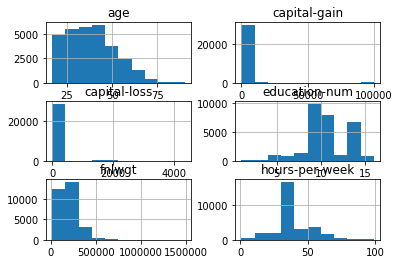

In [4]:
adult.replace('?',np.nan,inplace = True)  #adult中缺失值为？ 替换为np.nan 
adult.isnull().any()   #检测每列是否有缺失值
adult_new=adult.dropna()  #删除有缺失值的行
adult_new.isnull().any() # 检测新数据集是否有缺失值
adult_new.info()         #删除缺失值后的数据信息
adult_new.hist()

In [5]:
#数据标签列分开
adult_data=adult_new.iloc[:,:13]       
adult_target=adult_new['income']


## 决策树分类

In [6]:
adult_data_s= [i for i in adult_data.columns
                       if adult_data[i].dtype.name == 'object']
adult_data_n = [i for i in adult_data.columns
                     if adult_data[i].dtype.name != 'object']
X = pd.concat([adult_data[adult_data_n],
                        pd.get_dummies(adult_data[adult_data_s])], axis=1)
y=adult_target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
from sklearn import tree
from sklearn.model_selection  import cross_val_score
dtc=tree.DecisionTreeClassifier(criterion='entropy')  #定义分类器
dtc.fit(X_train,y_train)
score = dtc.score(X_test,y_test) 
score


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.815228202011272

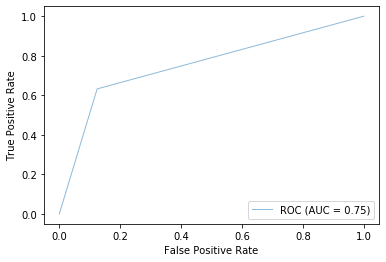

In [8]:
#roc曲线
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc, X_test,y_test,
                         name='ROC',
                         alpha=0.5, lw=1)

In [9]:
scores=cross_val_score(dtc, X, y, cv=10)#10折交叉验证
scores.mean()  #平均准确率
dtc.fit(X, y).feature_importances_  #特征重要性

0.8120152799037109

array([0.13287567, 0.20195557, 0.1022933 , 0.10156192, 0.03391105,
       0.06479506, 0.00535761, 0.00665153, 0.01086592, 0.00456282,
       0.00826503, 0.00455774, 0.        , 0.0004369 , 0.00112228,
       0.00056327, 0.        , 0.00026346, 0.00066575, 0.0002217 ,
       0.00130956, 0.00216638, 0.00158038, 0.00091787, 0.00097361,
       0.00308931, 0.00041987, 0.00037229, 0.00238074, 0.00217773,
       0.00085502, 0.18888751, 0.00084892, 0.00233987, 0.00110907,
       0.00077343, 0.0059445 , 0.        , 0.00726302, 0.00895556,
       0.00392222, 0.00366012, 0.00638879, 0.00523434, 0.        ,
       0.00634121, 0.00335265, 0.00870046, 0.00554014, 0.00480313,
       0.00177891, 0.00315243, 0.0006341 , 0.00193741, 0.00270663,
       0.00500919, 0.00152012, 0.00208023, 0.00591363, 0.00071316,
       0.00623942, 0.00221689, 0.00486357])

## KNN 

In [10]:
#数据处理
adult_data_s= [i for i in adult_data.columns
                       if adult_data[i].dtype.name == 'object']
adult_data_n = [i for i in adult_data.columns
                     if adult_data[i].dtype.name != 'object']

from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(adult_data[adult_data_n])# 数值型0-1规范化

X = pd.concat([adult_data[adult_data_n],
                        pd.get_dummies(adult_data[adult_data_s])], axis=1)
y=adult_target


array([[0.30136986, 0.04333771, 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.04727738, 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.1372439 , 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09391367, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.1276201 , 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18638336, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

#### 留出法 30%测试集，70%训练集

In [11]:
#按比例划分训练集和测试集   
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)# stratify 指定分层抽样的特征

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)#n_neighbors=k，距离默认欧式距离，当指定metric= 'minkowski'时，可加参数p=1为曼哈顿距离， p=2为欧式距离。
knn.fit(X_train, y_train)
score_knn=knn.score(X_test,y_test)
score_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

0.7490330423251188

In [12]:
#交叉验证
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)#n_neighbors=k，距离默认欧式距离，当指定metric= 'minkowski'时，可加参数p=1为曼哈顿距离， p=2为欧式距离。
scores = cross_val_score(knn,X,y, cv=5)#5折交叉验证
scores.mean()#平均准确率

0.7527682846026782

# 随机森林

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)  #定义分类器
rfc.fit(X_train, y_train)      #训练
scores=rfc.score(X_test,y_test)    #准确率
scores
print(rfc.feature_importances_)  #特征重要性

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.7750027627362139

[5.59908793e-02 0.00000000e+00 8.49906038e-02 1.31622812e-01
 1.45893961e-02 2.81816430e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.05060849e-03 3.07568858e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.87762845e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.82386832e-02 8.21805419e-03
 3.76131350e-03 8.22076622e-03 0.00000000e+00 3.52399428e-03
 2.17880103e-05 3.44900052e-03 0.00000000e+00 2.44380404e-01
 0.00000000e+00 5.07984247e-02 1.70975327e-05 8.14154475e-04
 1.44844465e-04 0.00000000e+00 0.00000000e+00 2.69016703e-02
 0.00000000e+00 2.34426235e-03 3.46296872e-03 1.35689385e-02
 0.00000000e+00 1.05416524e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.59966567e-01 3.27909403e-02
 2.15325760e-03 2.74102638e-02 3.41653893e-03 6.16429056e-03
 0.00000000e+00 7.09130310e-05 2.55453869e-03 0.00000000e+00
 0.00000000e+00 3.29794736e-02 1.56639245e-02]


# 支持向量机

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)#留出法划分数据集
from sklearn.svm import SVC
#3个不同核函数
svc1=SVC(kernel="rbf")
svc1.fit(X_train, y_train)
score_rbf=svc1.score(X_test,y_test)
score_rbf

# svc2=SVC(kernel="poly",degree=2,gamma=3)
# svc2.fit(X_train, y_train)
# score_poly=svc2.score(X_test,y_test)
# score_poly

# svc3=SVC(kernel="linear")
# svc3.fit(X_train, y_train)
# score_linear=svc3.score(X_test,y_test)
# score_linear


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.7855011603492098

## 交叉验证

<p><font size="3" color="red"> 交叉验证ROC曲线，使用时<br/>
 &nbsp;&nbsp;  1. 更改对应数据集<br/>
 &nbsp;&nbsp; 2. 指定分类器 classifier<br/>
 &nbsp;&nbsp;  3. 根据需要，修改曲线属性</p>

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[(-0.05, 1.05), (-0.05, 1.05), Text(0.5, 1.0, 'ROC曲线')]

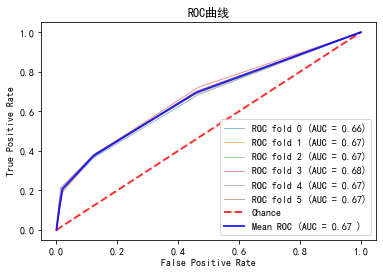

In [99]:
from sklearn.model_selection import cross_val_score  #交叉验证
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #图中文显示  SimHei 中文黑体字体
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc


X=np.array(X)   # 数据
y=np.array(y)       #标签  y

cv = StratifiedKFold(n_splits=6)  #n_splits 指定交叉验证折数，默认5

classifier = KNeighborsClassifier(n_neighbors=3) #分类器，朴素贝叶斯
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) #返回指定间隔上的等距数字 0-1之间  100个
fig, ax = plt.subplots()  #创建图形fig,ax

## n折交叉验证，每次训练画一条曲线，循环n次
for i, (train, test) in enumerate(cv.split(X, y)):    #cv.split(X, y)返回split的index
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.5, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)  #插入点
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

#画出AUC为0.5的线
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',    
        label='Chance', alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)    #平均tpr
mean_tpr[-1] = 1.0      
mean_auc = auc(mean_fpr, mean_tpr)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f )' %(mean_auc),lw=2, alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC曲线")  #图片名称，可修改
ax.legend(loc="lower right")   #图例
plt.show()